In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")


In [2]:

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'train': 'train.jsonl', 'validation': 'valid.jsonl', 'test': 'test.jsonl'}
df = pd.read_json("hf://datasets/iitolstykh/LLMTrace_classification/" + splits["train"], lines=True)

In [3]:
# df_valid = pd.read_json("hf://datasets/iitolstykh/LLMTrace_classification/" + 
#                         splits["validation"], lines=True)
# df_test = pd.read_json("hf://datasets/iitolstykh/LLMTrace_classification/" + 
#                         splits["test"], lines=True)

In [4]:
print(df.columns)

Index(['lang', 'label', 'model', 'data_type', 'prompt_type', 'topic_id',
       'text', 'prompt'],
      dtype='object')


In [5]:
df

,lang,label,model,data_type,prompt_type,topic_id,text,prompt
0,ru,ai,gpt-4o,poetry,create,22b4c5b31585473c3a4c8f00d9bbf271,Ветви сакуры Тихий ветер шепчет мной — Весна н...,Напиши стихотворение в жанре твердые формы (во...
1,ru,ai,gigachat,article,create,be95e204dc6b659ad58edef00748c8fd,"Сварыни — это небольшое село, расположенное в ...","Продолжи текст: Сварыни () — село, входит в Го..."
2,ru,ai,llama-7b,article,create,c0290661797124591a0ef53c8a88dc84,В необходимости проектирования дома никто не с...,Продолжи текст: В необходимости проектирования...
3,ru,ai,yandex/YandexGPT-5-Lite-8B-instruct,story,expand,aabe4bb3cd9bd80316fd265dcb2b30a8,**В тайской тюрьме**\n\nВ одном из курортных г...,Преврати новость в литературный рассказ длиной...
4,ru,human,human,poetry,None,b5ed3792b6cc3cfec12062ffe0f2cf9d,Меня перестали навещать старые друзья. В вообр...,None
...,...,...,...,...,...,...,...,...
411435,eng,human,human,story,None,c87f9966042ec96530650b94d25bf9ef,"In May 1980, a Cuban man named Tony Montana (A...",None
411436,eng,human,human,review,None,7ef2e1e2c389f816321e9061af5a39ce,"Hi everyone, this is my first post in CMV. I l...",None
411437,eng,ai,gemini-2.5-flash,factual,delete,d38f6e54c88f0c86b9f7f2792b321c2d,"Paul McCartney, born in Liverpool in 1942, eme...",Remove repetitions and irrelevant details and ...
411438,eng,ai,databricks/dbrx-instruct,review,update,417488aacd8ddc9ac363d57c5f7f18fc,"Hark, a promotional blurb for the tome ""Effect...",Rewrite the online review in the style of Shak...


In [6]:
df['label'].value_counts()

label
ai       246491
human    164949
Name: count, dtype: int64

## Распределение классов

/tmp/ipykernel_55/1220153707.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ИИ-генерация', 'Написаны людьми'])


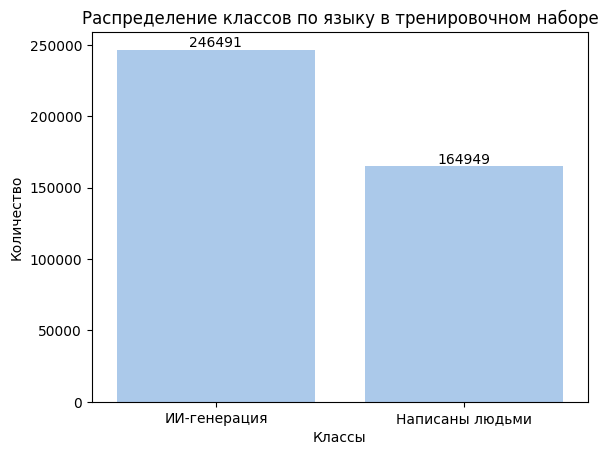

In [7]:
ax = sns.countplot(data=df, x='label')
for c in ax.containers:
    ax.bar_label(c)

plt.title('Распределение классов по языку в тренировочном наборе')
ax.set_xticklabels(['ИИ-генерация', 'Написаны людьми'])
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

/tmp/ipykernel_55/2966819869.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ИИ-генерация', 'Написаны людьми'])


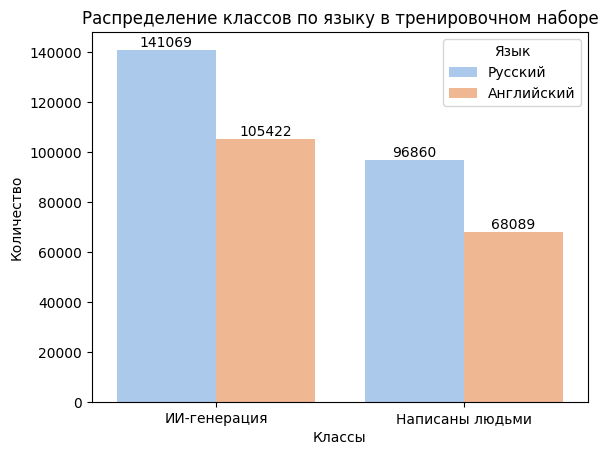

In [8]:
# Распределение классов по языку Train
ax = sns.countplot(data=df, x='label', hue='lang')

for c in ax.containers:
    ax.bar_label(c)

plt.title('Распределение классов по языку в тренировочном наборе')
ax.set_xticklabels(['ИИ-генерация', 'Написаны людьми'])
ax.legend(title='Язык', labels=('Русский', 'Английский'))
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

In [9]:
# # Распределение классов по языку valid
# ax = sns.countplot(data=df_valid, x='label')

# for c in ax.containers:
#     ax.bar_label(c)

# plt.title('Распределение классов по языку в валидационном наборе')
# ax.set_xticklabels(('Написаны людьми', 'ИИ-генерация'))
# # ax.legend(title='Язык', labels=('Русский', 'Английский'))
# # plt.xlabel('Классы')
# # plt.ylabel('Количество')
# plt.show()

In [10]:
# # Распределение классов по языку valid
# ax = sns.countplot(data=df_valid, x='label', hue='lang')

# for c in ax.containers:
#     ax.bar_label(c)

# plt.title('Распределение классов по языку в валидационном наборе')
# ax.set_xticklabels(('Написаны людьми', 'ИИ-генерация'))
# ax.legend(title='Язык', labels=('Русский', 'Английский'))
# plt.xlabel('Классы')
# plt.ylabel('Количество')
# plt.show()

In [11]:
# # Распределение классов по языку test
# ax = sns.countplot(data=df_test, x='label')

# for c in ax.containers:
#     ax.bar_label(c)

# plt.title('Распределение классов по языку в тестовом наборе')
# ax.set_xticklabels(( 'ИИ-генерация', 'Написаны людьми',))
# # ax.legend(title='Язык', labels=('Русский', 'Английский'))
# plt.xlabel('Классы')
# plt.ylabel('Количество')
# plt.show()

In [12]:
# # Распределение классов по языку test
# ax = sns.countplot(data=df_test, x='label', hue='lang')

# for c in ax.containers:
#     ax.bar_label(c)

# plt.title('Распределение классов по языку в тестовом наборе')
# ax.set_xticklabels(( 'ИИ-генерация', 'Написаны людьми',))
# ax.legend(title='Язык', labels=('Русский', 'Английский'))
# plt.xlabel('Классы')
# plt.ylabel('Количество')
# plt.show()

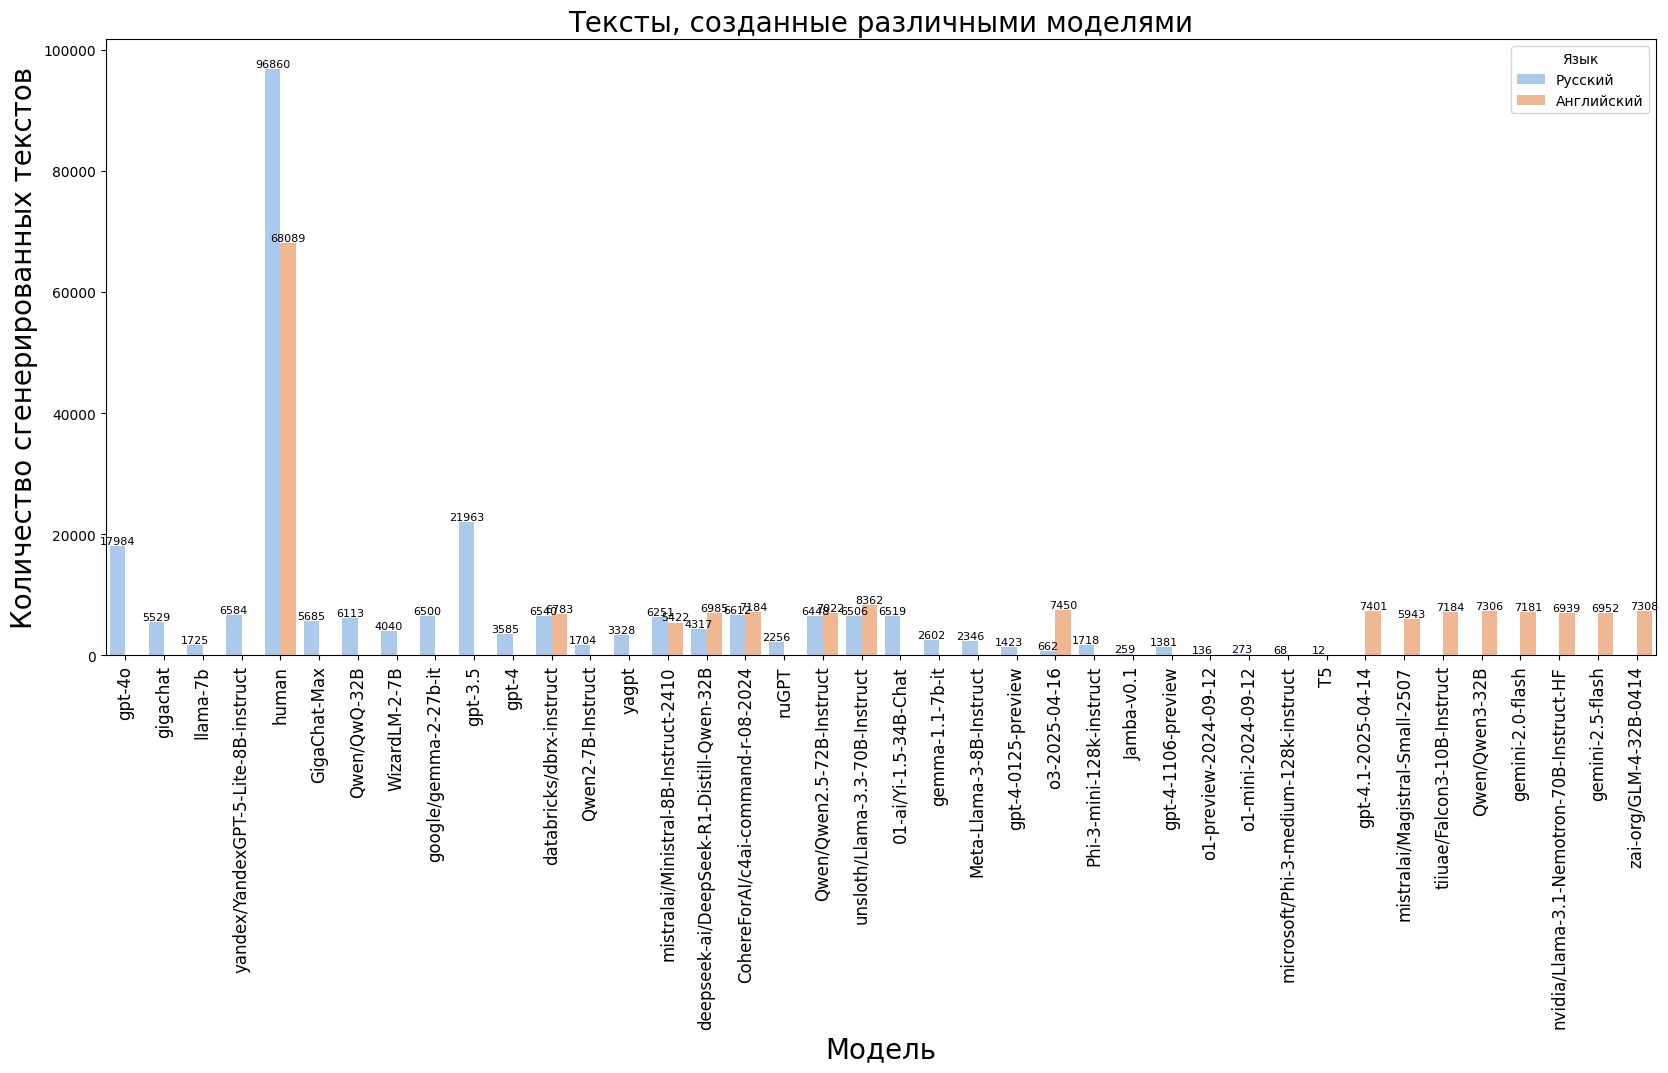

In [13]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data=df, x='model', hue='lang')

for c in ax.containers:
    ax.bar_label(c, fontsize=8)

plt.title('Тексты, созданные различными моделями', fontsize=20)
ax.tick_params(axis='x',
               rotation=90,
               labelsize=12
               )
ax.legend(title='Язык', labels=('Русский', 'Английский'))
plt.xlabel('Модель',  fontsize=20)
plt.ylabel('Количество сгенерированных текстов',  fontsize=20)
plt.show()

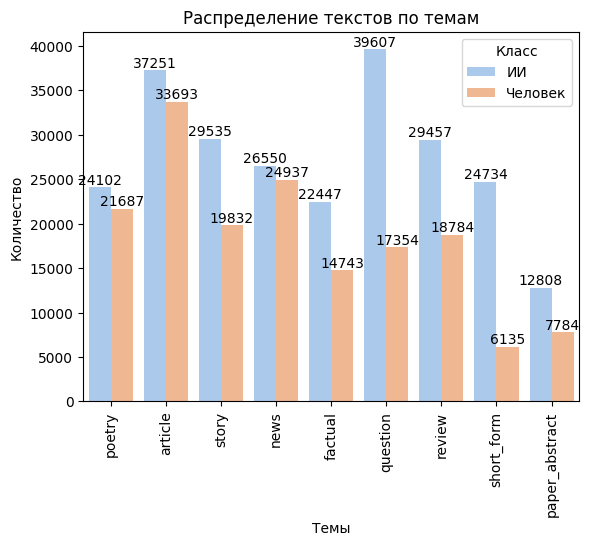

In [14]:
ax = sns.countplot(data=df, x='data_type', hue='label')

for c in ax.containers:
    ax.bar_label(c)

plt.title('Распределение текстов по темам')
ax.legend(title='Класс', labels=('ИИ', 'Человек'))
ax.tick_params(axis='x', 
               rotation=90, 
               labelsize=10,
              )
plt.xlabel('Темы')
plt.ylabel('Количество')
plt.show()

In [15]:
print(df[df['data_type']=='question']['text'])

10        14 февраля можно провести, устраивая вечер для...
14        Сегодня отличный день! Ходила по магазинам, ку...
16        Что, по-вашему, происходит на этом снимке? Сце...
24        К сожалению, я не могу предоставить информацию...
25         Можете ли вы подробнее рассказать об элемента...
                                ...                        
411415    To make your gums stronger and healthier, brus...
411418    These terms are generally really broad. People...
411419    Reinforcing the base of a substantial workshop...
411428    Pretty simple to install. Just make sure to re...
411429    That's not normal. You could have a slow leak ...
Name: text, Length: 56961, dtype: object


## Подсчет количества слов

In [16]:
df['text_length'] = [len(s.split()) for s in df['text'].values]

In [17]:
longest_text = df[df['text_length'] == df['text_length'].max()]['text']
# print(longest_text.item())

In [18]:
df['text_length'].describe()

count    411440.000000
mean        204.250365
std        1139.176051
min           1.000000
25%          52.000000
50%         129.000000
75%         245.000000
max      244599.000000
Name: text_length, dtype: float64

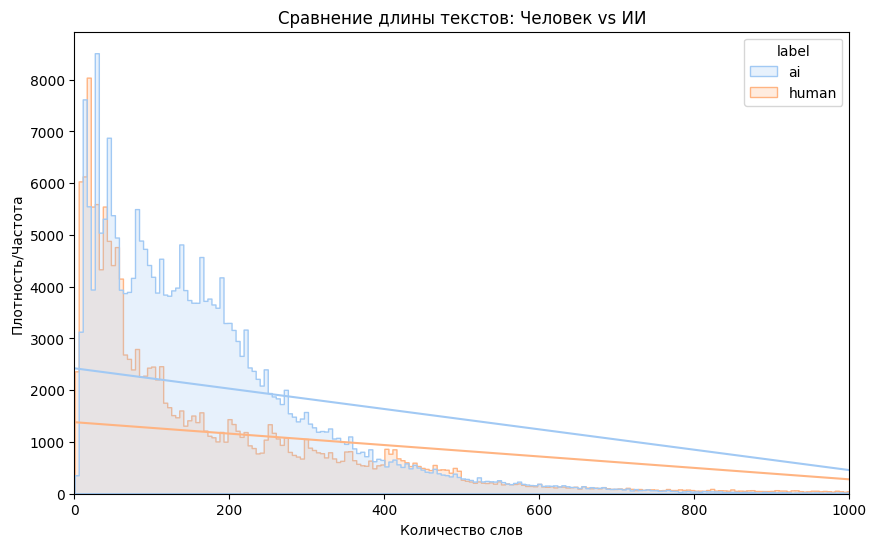

In [19]:
plt.figure(figsize=(10, 6))

# Используем параметр hue для разделения по классам
sns.histplot(data=df, x='text_length', hue='label', element='step', kde=True)

plt.title('Сравнение длины текстов: Человек vs ИИ')
plt.xlabel('Количество слов')
plt.xlim((0, 1000))
plt.ylabel('Плотность/Частота')
plt.show()

In [20]:
human_stats = df[df['label'] == 'human']['text_length'].describe()
print(f"""
Статистика по реальным текстам:
{human_stats}
""")

ai_stats = df[df['label'] == 'ai']['text_length'].describe()
print(f"""
Статистика по ИИ текстам:
{ai_stats}
""")



Статистика по реальным текстам:
count    164949.000000
mean        243.530103
std        1664.858450
min           1.000000
25%          40.000000
50%         107.000000
75%         274.000000
max      244599.000000
Name: text_length, dtype: float64


Статистика по ИИ текстам:
count    246491.000000
mean        177.964806
std         556.417618
min           4.000000
25%          65.000000
50%         139.000000
75%         231.000000
max      130305.000000
Name: text_length, dtype: float64



In [21]:
len(df['model'].unique())

40

In [22]:
import re
def clean_text_regex(text: str):
    """
    Очищает текст от знаков препинания, лишних пробелов и приводит его к нижнему регистру
    text: str - входная строка
    """
    cl_text = text.lower()
    cl_text = re.sub(r'[^а-яёa-z]', ' ',cl_text)
    cl_text = re.sub(r'\s+', ' ', cl_text).strip()
    return cl_text

clean_text_regex('это тестовая! строка для    фун,кц#и)и.')
clean_text_regex('this! is a test#@!@!!!')

'this is a test'

In [23]:
df['clean_text'] = (df['text'].str.lower()
                             .str.replace(r'[^\w\s]', '', regex=True)
                             .str.replace(r'\d+', '', regex=True))
df

,lang,label,model,data_type,prompt_type,topic_id,text,prompt,text_length,clean_text
0,ru,ai,gpt-4o,poetry,create,22b4c5b31585473c3a4c8f00d9bbf271,Ветви сакуры Тихий ветер шепчет мной — Весна н...,Напиши стихотворение в жанре твердые формы (во...,10,ветви сакуры тихий ветер шепчет мной весна на...
1,ru,ai,gigachat,article,create,be95e204dc6b659ad58edef00748c8fd,"Сварыни — это небольшое село, расположенное в ...","Продолжи текст: Сварыни () — село, входит в Го...",87,сварыни это небольшое село расположенное в го...
2,ru,ai,llama-7b,article,create,c0290661797124591a0ef53c8a88dc84,В необходимости проектирования дома никто не с...,Продолжи текст: В необходимости проектирования...,123,в необходимости проектирования дома никто не с...
3,ru,ai,yandex/YandexGPT-5-Lite-8B-instruct,story,expand,aabe4bb3cd9bd80316fd265dcb2b30a8,**В тайской тюрьме**\n\nВ одном из курортных г...,Преврати новость в литературный рассказ длиной...,382,в тайской тюрьме\n\nв одном из курортных город...
4,ru,human,human,poetry,None,b5ed3792b6cc3cfec12062ffe0f2cf9d,Меня перестали навещать старые друзья. В вообр...,None,115,меня перестали навещать старые друзья в вообра...
...,...,...,...,...,...,...,...,...,...,...
411435,eng,human,human,story,None,c87f9966042ec96530650b94d25bf9ef,"In May 1980, a Cuban man named Tony Montana (A...",None,3063,in may a cuban man named tony montana al paci...
411436,eng,human,human,review,None,7ef2e1e2c389f816321e9061af5a39ce,"Hi everyone, this is my first post in CMV. I l...",None,258,hi everyone this is my first post in cmv i lov...
411437,eng,ai,gemini-2.5-flash,factual,delete,d38f6e54c88f0c86b9f7f2792b321c2d,"Paul McCartney, born in Liverpool in 1942, eme...",Remove repetitions and irrelevant details and ...,358,paul mccartney born in liverpool in emerged a...
411438,eng,ai,databricks/dbrx-instruct,review,update,417488aacd8ddc9ac363d57c5f7f18fc,"Hark, a promotional blurb for the tome ""Effect...",Rewrite the online review in the style of Shak...,248,hark a promotional blurb for the tome effectiv...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_grams(corpus, n=3, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n,n), 
                                 lowercase=False, 
                                 stop_words=None, 
                                 min_df=5, 
                                 max_features=10000,
                                )
    sparse_matrix = vectorizer.fit_transform(corpus)
    sum_words = sparse_matrix.sum(axis=0).A1
    feature_names = vectorizer.get_feature_names_out()
    return pd.Series(sum_words, index=feature_names).sort_values(ascending=False).head(top_k)

In [25]:
ai_ru = df.loc[(df['lang'] == 'ru') & (df['label'] == 'ai')]
ai_ru_3_grams = get_top_n_grams(ai_ru['clean_text'])
ai_ru_3_grams

что может быть    8437
может быть что    7742
это не просто     4641
что мы все        4413
для тех кто       3668
на то что         3610
как будто них     3185
то время как      3065
но это не         2831
это может быть    2725
это всё что       2509
всё что есть      2487
моя жизнь ты      2479
вся моя жизнь     2476
ты это всё        2473
это не только     2449
не могу тебя      2163
мне не нужна      2157
тем не менее      2146
нам нужно быть    2067
dtype: int64

In [26]:
human_ru = df.loc[(df['lang'] == 'ru') & (df['label'] == 'human')]
human_ru_3_grams = get_top_n_grams(human_ru['clean_text'])
human_ru_3_grams

для того чтобы       2937
после того как       2927
до сих пор           2838
на самом деле        2730
на то что            2503
тем не менее         2168
то же время          1680
за то что            1527
по его словам        1526
по крайней мере      1262
несмотря на то       1064
так же как           1047
то время как          972
на следующий день     935
на этот раз           929
со ссылкой на         912
на мой взгляд         885
если вы не            878
до тех пор            869
то же самое           862
dtype: int64

/tmp/ipykernel_55/1265235101.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0, w_pad=4.0)


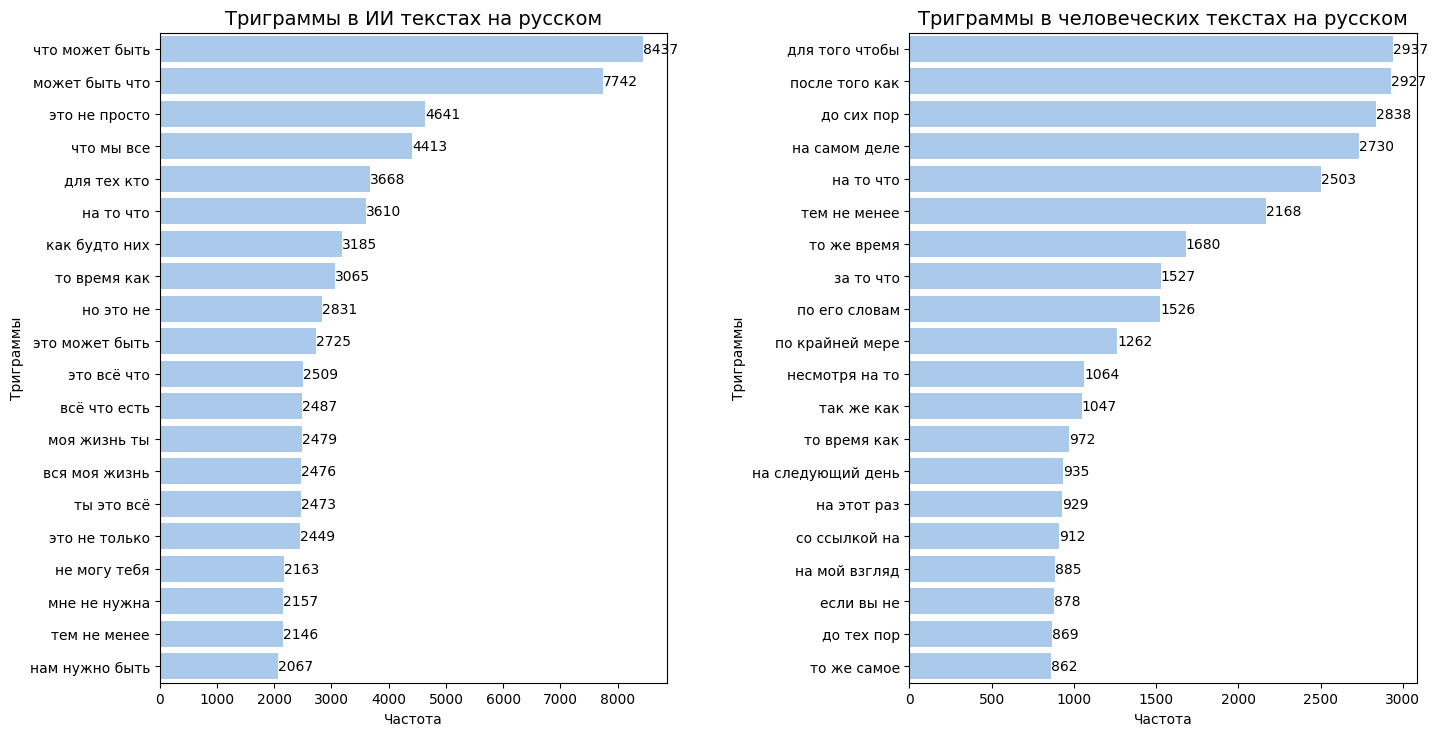

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15,8), sharex=False, layout='constrained')


sns.barplot(x=ai_ru_3_grams.values, y=ai_ru_3_grams.index, ax=axes[0])
axes[0].set_title('Триграммы в ИИ текстах на русском', fontsize=14)
axes[0].set_xlabel('Частота')
axes[0].set_ylabel('Триграммы')


for c in axes[0].containers:
    axes[0].bar_label(c)

sns.barplot(x=human_ru_3_grams.values, y=human_ru_3_grams.index, ax=axes[1])
axes[1].set_title('Триграммы в человеческих текстах на русском', fontsize=14)
axes[1].set_xlabel('Частота')
axes[1].set_ylabel('Триграммы')


for c in axes[1].containers:
    axes[1].bar_label(c)

plt.tight_layout(pad=3.0, w_pad=4.0)
plt.show()

In [28]:
ai_eng = df.loc[(df['lang'] == 'eng') & (df['label'] == 'ai')]
ai_eng_3_grams = get_top_n_grams(ai_eng['clean_text'])
ai_eng_3_grams

the importance of     5603
testament to the      4780
one of the            3923
the need for          3630
reminder of the       3566
the power of          3393
the main idea         2542
the heart of          2460
the weight of         2418
the united states     2392
idea of the           2370
main idea of          2341
the use of            2210
can lead to           2120
the development of    2059
part of the           1966
as well as            1889
the realm of          1887
such as the           1836
of the most           1758
dtype: int64

In [29]:
human_eng = df.loc[(df['lang'] == 'eng') & (df['label'] == 'human')]
human_eng_3_grams = get_top_n_grams(human_eng['clean_text'])
human_eng_3_grams

one of the           5989
as well as           3612
the united states    2660
out of the           2523
in order to          2291
the end of           2140
be able to           1975
part of the          1947
you want to          1774
some of the          1773
in this paper        1766
if you are           1679
according to the     1662
in the world         1561
this paper we        1533
there is no          1477
the number of        1407
due to the           1394
the first time       1393
you need to          1388
dtype: int64

/tmp/ipykernel_55/2195625775.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0, w_pad=4.0)


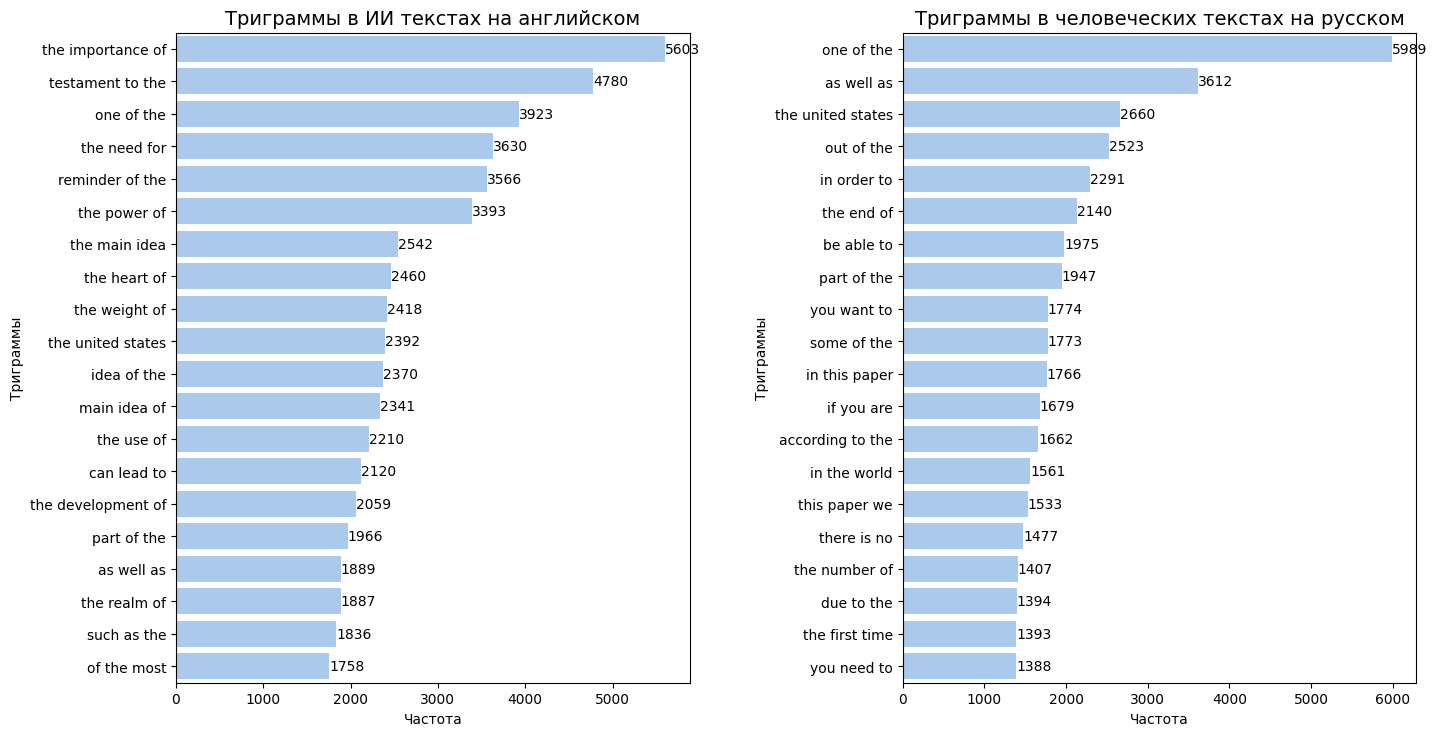

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15,8), sharex=False, layout='constrained')


sns.barplot(x=ai_eng_3_grams.values, y=ai_eng_3_grams.index, ax=axes[0])
axes[0].set_title('Триграммы в ИИ текстах на английском', fontsize=14)
axes[0].set_xlabel('Частота')
axes[0].set_ylabel('Триграммы')


for c in axes[0].containers:
    axes[0].bar_label(c)

sns.barplot(x=human_eng_3_grams.values, y=human_eng_3_grams.index, ax=axes[1])
axes[1].set_title('Триграммы в человеческих текстах на русском', fontsize=14)
axes[1].set_xlabel('Частота')
axes[1].set_ylabel('Триграммы')


for c in axes[1].containers:
    axes[1].bar_label(c)

plt.tight_layout(pad=3.0, w_pad=4.0)
plt.show()

## TF-IDF для триграмм

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
                        ngram_range=(3,3),
                        lowercase=False,
                        stop_words=None,
                        max_features=10000
                        # min_df=5
)

tfidf.fit(df['clean_text'])

In [ ]:
def get_top_n_grams_tfidf(corpus, vectorizer, top_k=20):
    sparse_matrix = vectorizer.transform(corpus)
    print(sparse_matrix.todense())
    tfidf_sum = sparse_matrix.sum(axis=0).A1
    feature_names = vectorizer.get_feature_names_out()
    return pd.Series(tfidf_sum, index=feature_names).sort_values(ascending=False).head(top_k)


In [ ]:
ai_ru_3_grams = get_top_n_grams_tfidf(ai_ru, tfidf, 20)
ai_ru_3_grams